In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import requests
import matplotlib.pyplot as plt # we only need pyplot
from alpha_vantage.timeseries import TimeSeries
sb.set() # set the default Seaborn style for graphics

## Our Problem
---
Our aim is to find out the correlation between various stock prices with respect to Covid-19 situation in USA. From there, we tried to predict future stock prices using machine learning. Thus for this problem, we would be comparing US companies stock prices as it is more closely related to the Covid cases in USA.


## Collecting datasets from Alpha Vantage

Companies to explore: **Moderna, Pfizer, Johnson&Johnson, Netflix, Delta Airlines, Dell, BP**.<br><br>
We looked into companies from various industries which include:
1. Pharmaceutical
2. Entertainment
3. Aviation
4. Computer technologies
5. Oil

### Mordena Stock

Before retrieving our stock dataset, we obtained our API key from Alpha Vantage.
<br>From here, we retrieved the dataset for the stock we wished to explore using the API key.

In [2]:
ts = TimeSeries(key='LSIZKHUTD8BX7SK9',output_format='pandas')
# Get json object with the daily data and another with  the call's metadata
mrna_data, mrna_meta_data = ts.get_daily('MRNA',outputsize='full')

mrna_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-04-22,168.26,179.0000,164.6200,168.10,15922383.0
2021-04-21,158.60,170.1100,157.6901,169.50,11352741.0
2021-04-20,160.32,162.7300,153.2700,156.78,7154386.0
2021-04-19,166.61,168.1958,159.6000,161.91,10006646.0
2021-04-16,158.68,171.9200,158.2100,170.81,19044899.0


We extracted only the daily close prices as we wished to find out if covid cases will affect stock prices during the day.

In [3]:
mrna_close = pd.DataFrame(mrna_data['4. close'])
mrna_close = mrna_close.rename(columns={"4. close": "DailyClose"})

Next, we used pd.to_datetime().date() to get our starting and ending dates to extract the data.
We then repeat the above steps for the other companies.

Specifically for Moderna, we have created a time shifted copy to account for time lag. This is to see how long the information from number of Covid-19 case rise takes to affect stock price.

In [4]:
mrna_close2 = mrna_close
mrna_close2 = mrna_close2.shift(20)

startdate = pd.to_datetime("2021-03-01").date()
enddate = pd.to_datetime("2020-01-13").date()
mrna_close = mrna_close.loc[startdate:enddate]
mrna_close2 = mrna_close2.loc[startdate:enddate]

mrna_close

,DailyClose
date,
2021-03-01,157.40
2021-02-26,154.81
2021-02-25,148.38
2021-02-24,144.79
2021-02-23,150.17
...,...
2020-01-17,20.62
2020-01-16,21.01
2020-01-15,20.24


This is the shifted dataset of Moderna.

In [5]:
mrna_close2

,DailyClose
date,
2021-03-01,123.420
2021-02-26,133.280
2021-02-25,133.330
2021-02-24,131.610
2021-02-23,136.520
...,...
2020-01-17,18.910
2020-01-16,19.000
2020-01-15,19.045


### Johnson & Johnson Stock

In [6]:
jnj_data, jnj_meta_data = ts.get_daily('JNJ',outputsize='full')
jnj_close = pd.DataFrame(jnj_data['4. close'])
jnj_close = jnj_close.rename(columns={"4. close": "DailyClose"})
jnj_close = jnj_close.loc[startdate:enddate]

### Netflix Inc Stock

In [7]:
nflx_data, nflx_meta_data = ts.get_daily('NFLX',outputsize='full')
nflx_close = pd.DataFrame(nflx_data['4. close'])
nflx_close = nflx_close.rename(columns={"4. close": "DailyClose"})
nflx_close = nflx_close.loc[startdate:enddate]

### Delta Air Lines, Inc Stock

In [8]:
dal_data, dal_meta_data = ts.get_daily('DAL',outputsize='full')
dal_close = pd.DataFrame(dal_data['4. close'])
dal_close = dal_close.rename(columns={"4. close": "DailyClose"})
dal_close = dal_close.loc[startdate:enddate]

### Dell Technologies Inc Stock

In [9]:
# Get json object with the daily data and another with  the call's metadata
dell_data, dell_meta_data = ts.get_daily('DELL',outputsize='full')
dell_close = pd.DataFrame(dell_data['4. close'])
dell_close = dell_close.rename(columns={"4. close": "DailyClose"})
dell_close = dell_close.loc[startdate:enddate]

### BP Stock Price

In [10]:
bp_data, bp_meta_data = ts.get_daily('BP',outputsize='full')
bp_close = pd.DataFrame(bp_data['4. close'])
bp_close = bp_close.rename(columns={"4. close": "DailyClose"})
bp_close = bp_close.loc[startdate:enddate]

## Collecting dataset for Covid-19 

The dataset is taken from The Covid Tracking Project which includes the number of deaths, number of hospitalised, and number of positive increase per day. These are representative of the situation in United States of America.

In [11]:
covid = pd.read_csv('national-history.csv')
# data is collected from covidtracking.com

In [12]:
covid.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515148.0,839,45475.0,8137.0,726,40212.0,878613.0,74582825.0,131835,4281.0,2801.0,28756184.0,41530,56,363824818,1169754
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,877887.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,877384.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,874603.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,873073.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795


In [13]:
covid = pd.DataFrame(covid[['date','positiveIncrease']])
# remove the other columns as the only datas we need is date and PositiveIncrease

After researching, we found out that the stock market is closed on weekends in the United States of America, where we are collecting our data from.
<br>Hence, we removed all the weekends from our time series data.

In [14]:
from pandas.tseries.offsets import BDay
isBusinessDay = BDay().onOffset
match_series = pd.to_datetime(covid['date']).map(isBusinessDay)
covid = covid[match_series]

C:\Users\Yan Qi\anaconda3\lib\site-packages\pandas\core\base.py:937: FutureWarning: onOffset is a deprecated, use is_on_offset instead
  new_values = map_f(values, mapper)


In [15]:
covid_positive = covid.set_index('date')

In [16]:
covid_positive

,positiveIncrease
date,
2021-03-05,68787
2021-03-04,65487
2021-03-03,66836
2021-03-02,54248
2021-03-01,48092
...,...
2020-01-17,0
2020-01-16,0
2020-01-15,0


After analysing the dataset once more, we realised that stocks dataset still has 15 rows of dataset lesser compared to the covid19 dataset.<br> Thus, we explored once more and realised that we had forgotten to consider America's public holidays. Finally, after removing these dates, the stocks dataset and covid19 dataset are now aligned. 

In [17]:
from datetime import datetime

#List of dates to drop: Stock market holiday/extra dates.
date_list = ["2020-01-20",
             "2020-02-17",
             "2020-04-10",
             "2020-05-25",
             "2020-07-03",
             "2020-09-07",
             "2020-11-26",
             "2020-12-25",
             "2021-01-01",
             "2021-01-18",
             "2021-02-15",
             "2021-03-02",
             "2021-03-03",
             "2021-03-04",
             "2021-03-05"]
for x in range(15):
  covid_positive = covid_positive.drop(date_list[x])

In [18]:
covid_edit = covid_positive
covid_edit

,positiveIncrease
date,
2021-03-01,48092
2021-02-26,74857
2021-02-25,75565
2021-02-24,73258
2021-02-23,69105
...,...
2020-01-17,0
2020-01-16,0
2020-01-15,0


---

## Exploratory Analysis

In this subsection, we explore the data using boxplots, histograms and violin plots. These are basic uni-variate figures for each stock, and Covid 19 cases.
<br>Another analysis we did is by using bi-variate analysis between Covid 19 cases and each stock price to see their relationship.
<br>We also learnt how to plot 2 timeseries data on the same graph using twin axes, labelling and header.

### Positive increase (Covid 19 Cases)

<AxesSubplot:>

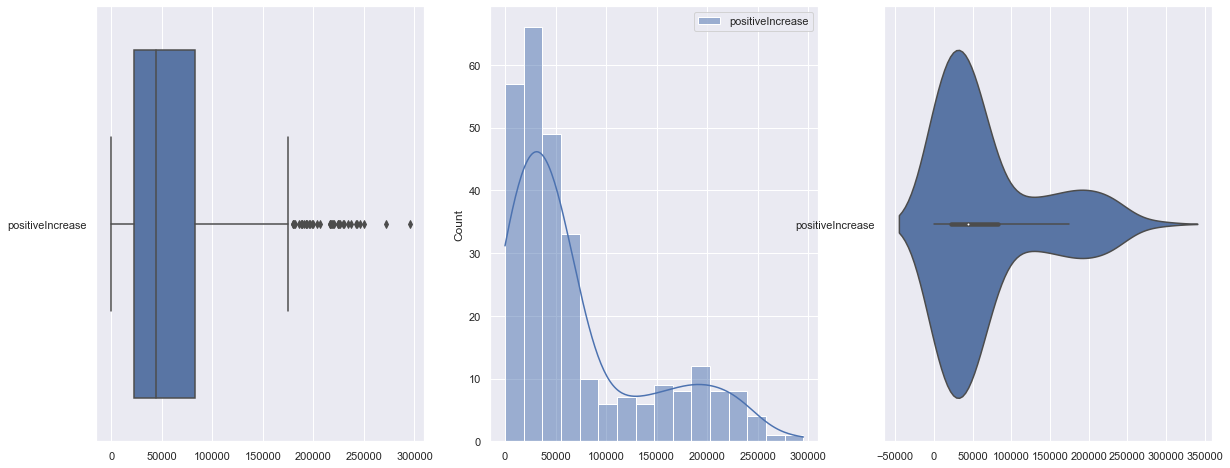

In [19]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = covid_edit, orient = "h", ax = axes[0])
sb.histplot(data = covid_edit, kde = True, ax = axes[1])
sb.violinplot(data = covid_edit, orient = "h", ax = axes[2])

### Moderna Daily Close

<AxesSubplot:>

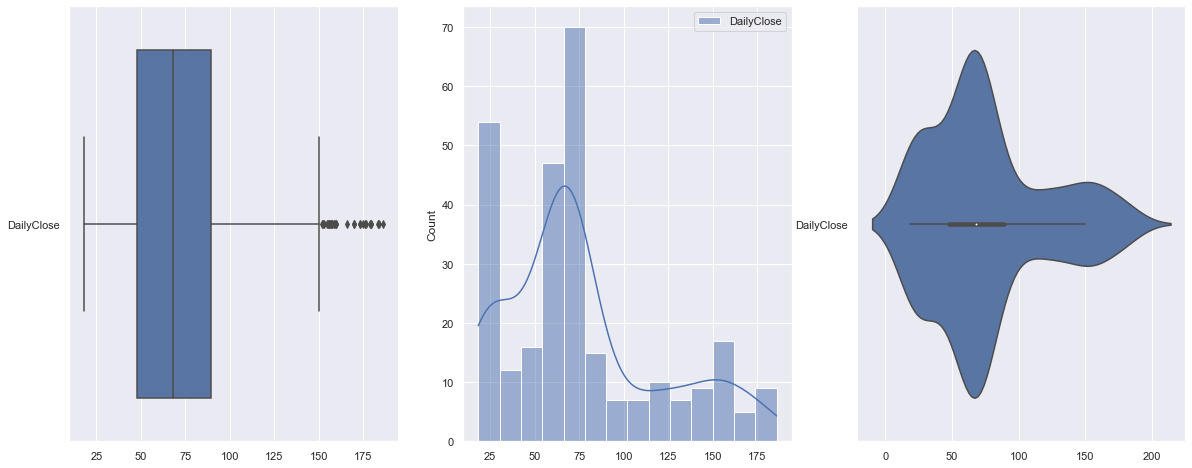

In [20]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = mrna_close, orient = "h", ax = axes[0])
sb.histplot(data = mrna_close, kde = True, ax = axes[1])
sb.violinplot(data = mrna_close, orient = "h", ax = axes[2])

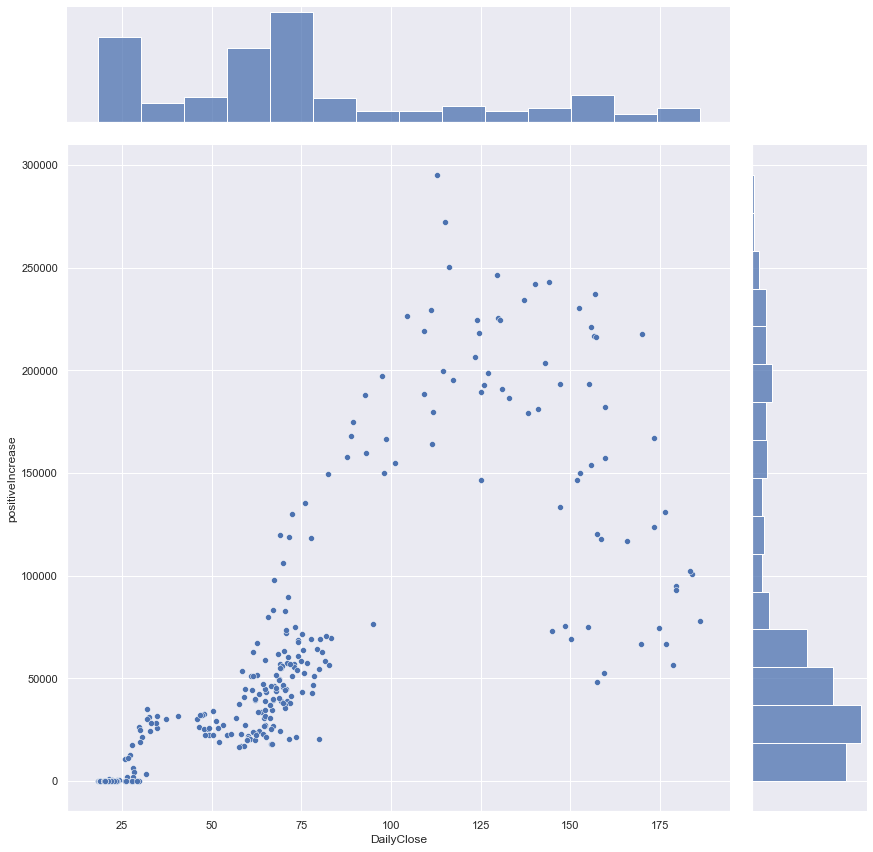

In [55]:
# Create a joint dataframe by concatenating the two variables
covidmrna = pd.concat([covid_edit, mrna_close], axis = 1).reindex(covid_edit.index)

sb.jointplot(data = covidmrna, x = "DailyClose", y = "positiveIncrease", height = 12)
# covidmrna

<AxesSubplot:>

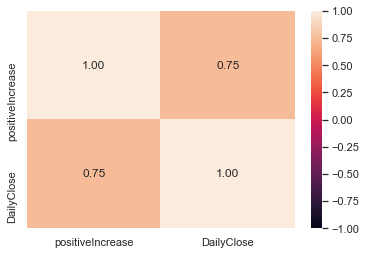

In [56]:
sb.heatmap(covidmrna.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

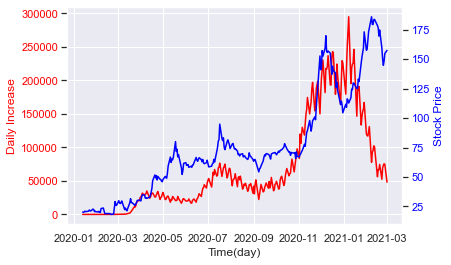

<Figure size 75x75 with 0 Axes>

In [22]:
mrna_edit = mrna_close.reset_index()
mrna_edit.date = pd.to_datetime(mrna_edit.date)

covid_edit.index = pd.to_datetime(covid_edit.index)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(mrna_edit.date, mrna_edit.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

### Moderna Time Shifted Daily Close

<AxesSubplot:>

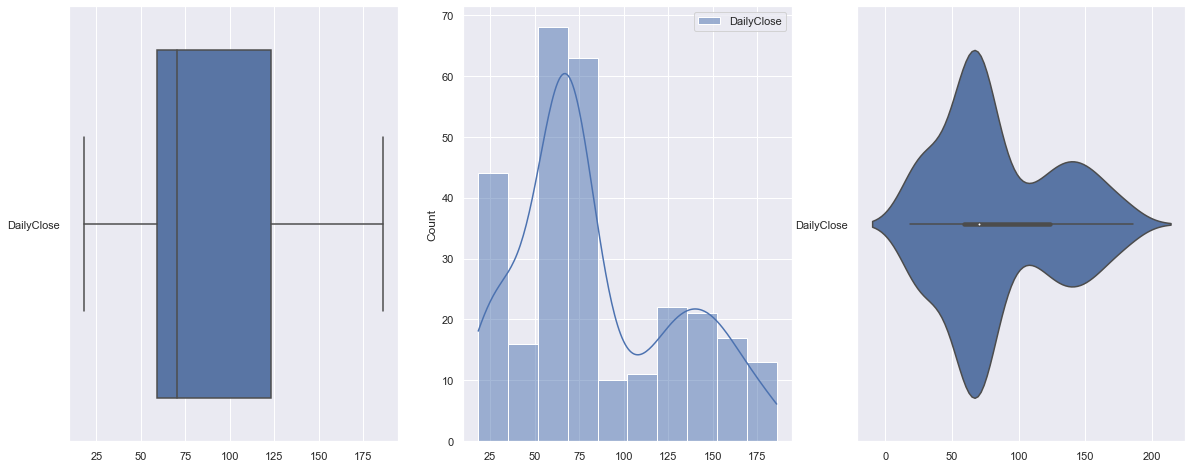

In [23]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = mrna_close2, orient = "h", ax = axes[0])
sb.histplot(data = mrna_close2, kde = True, ax = axes[1])
sb.violinplot(data = mrna_close2, orient = "h", ax = axes[2])

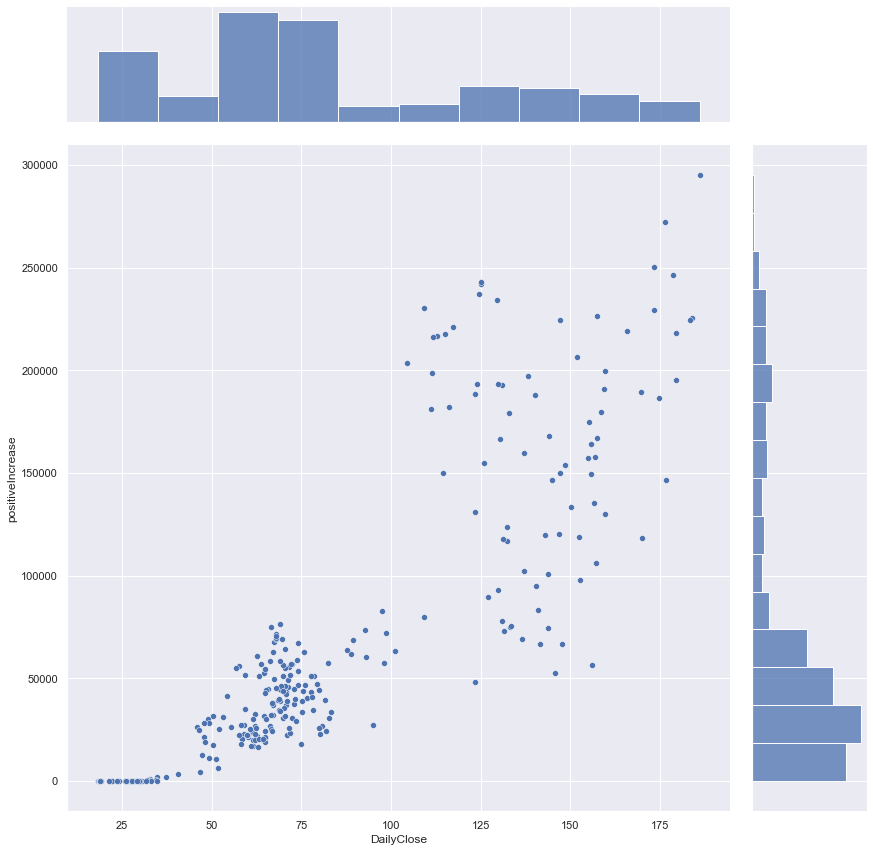

In [24]:
# Create a joint dataframe by concatenating the two variables
covidmrna2 = pd.concat([covid_edit, mrna_close2], axis = 1).reindex(covid_edit.index)

sb.jointplot(data = covidmrna2, x = "DailyClose", y = "positiveIncrease", height = 12)
# covidmrna

<AxesSubplot:>

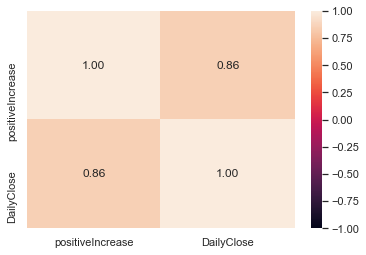

In [25]:
sb.heatmap(covidmrna2.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

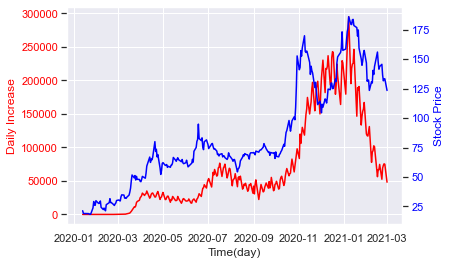

<Figure size 75x75 with 0 Axes>

In [26]:
mrna_edit2 = mrna_close2.reset_index()
mrna_edit2.date = pd.to_datetime(mrna_edit2.date)

covid_edit.index = pd.to_datetime(covid_edit.index)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(mrna_edit2.date, mrna_edit2.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

### Johnson & Johnson Daily Close

<AxesSubplot:>

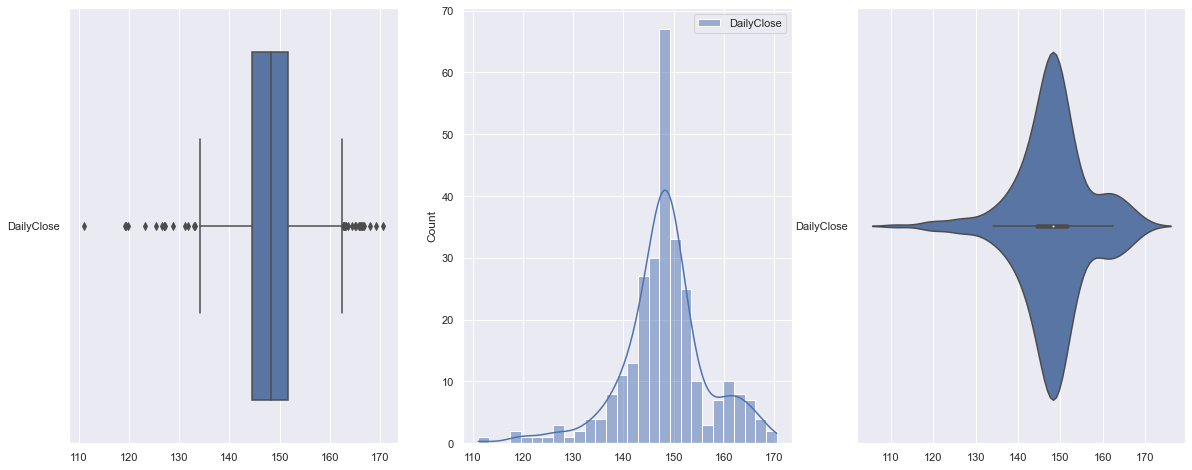

In [27]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = jnj_close, orient = "h", ax = axes[0])
sb.histplot(data = jnj_close, kde = True, ax = axes[1])
sb.violinplot(data = jnj_close, orient = "h", ax = axes[2])

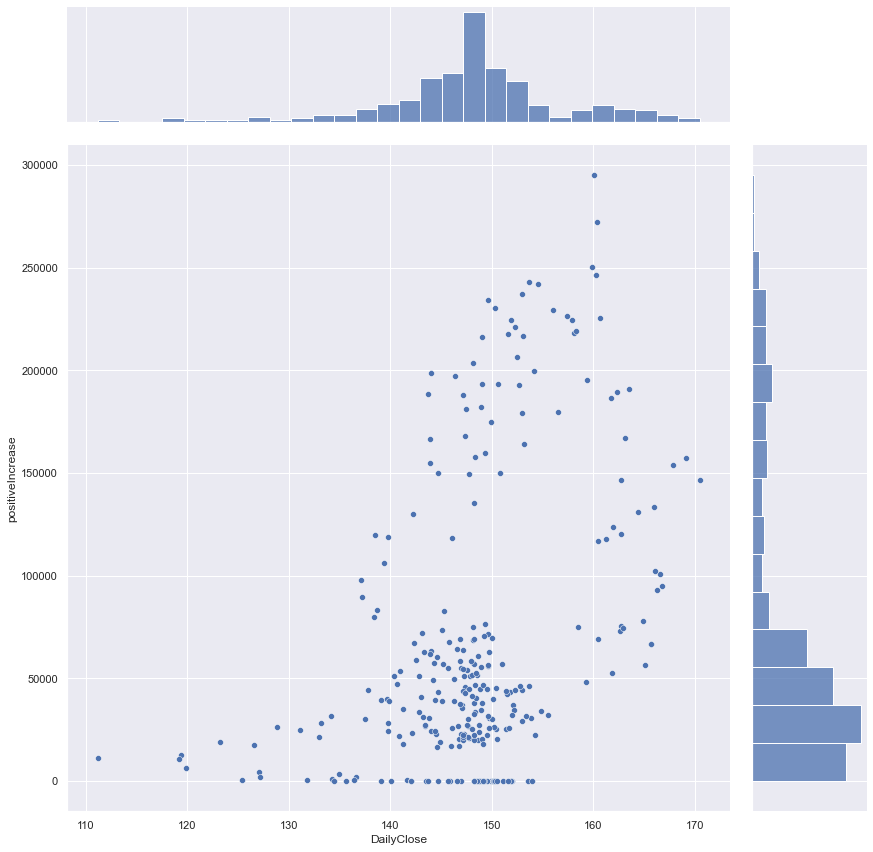

In [28]:
# Create a joint dataframe by concatenating the two variables
covidjnj = pd.concat([covid_edit, jnj_close], axis = 1).reindex(covid_edit.index)

sb.jointplot(data = covidjnj, x = "DailyClose", y = "positiveIncrease", height = 12)
# covidjnj

<AxesSubplot:>

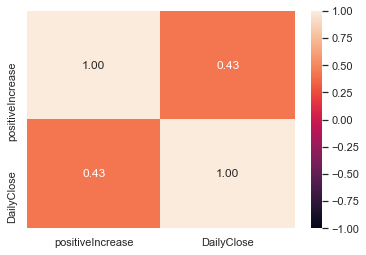

In [29]:
sb.heatmap(covidjnj.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

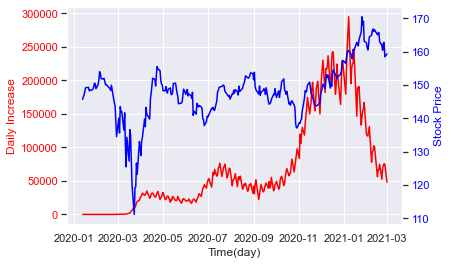

<Figure size 75x75 with 0 Axes>

In [30]:
jnj_edit = jnj_close.reset_index()
jnj_edit.date = pd.to_datetime(jnj_edit.date)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')
ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(jnj_edit.date, jnj_edit.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

### Netflix Inc Daily Close

<AxesSubplot:>

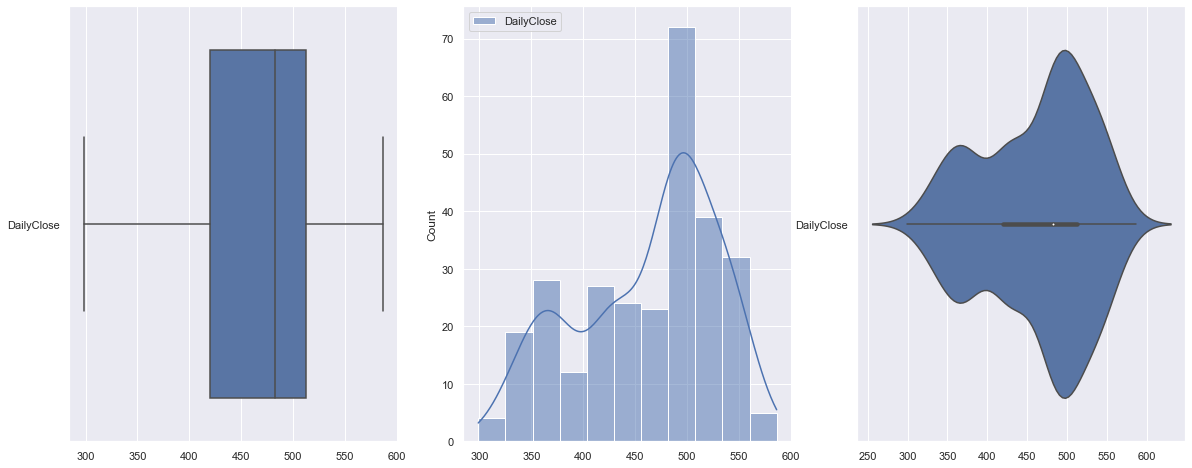

In [31]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = nflx_close, orient = "h", ax = axes[0])
sb.histplot(data = nflx_close, kde = True, ax = axes[1])
sb.violinplot(data = nflx_close, orient = "h", ax = axes[2])

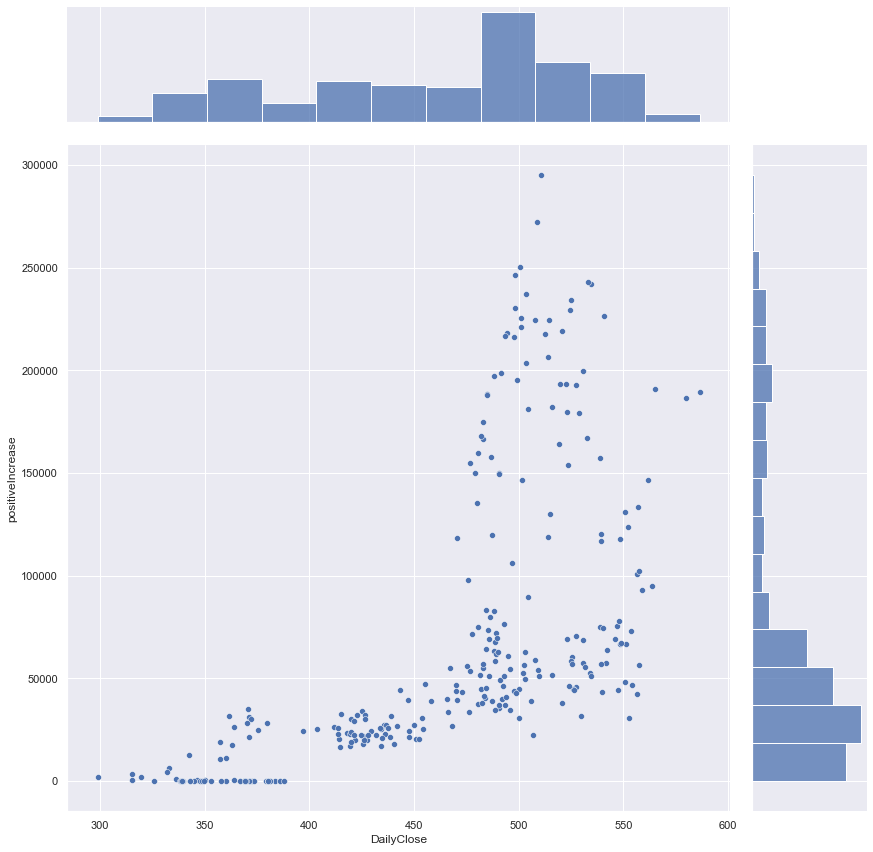

In [32]:
# Create a joint dataframe by concatenating the two variables
covidnflx = pd.concat([covid_edit, nflx_close], axis = 1).reindex(covid_edit.index)

sb.jointplot(data = covidnflx, x = "DailyClose", y = "positiveIncrease", height = 12)
# covidnflx

<AxesSubplot:>

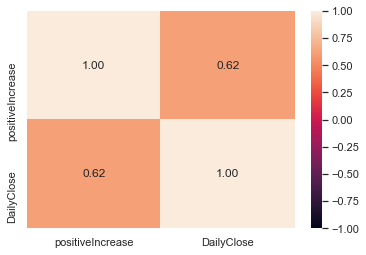

In [33]:
sb.heatmap(covidnflx.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

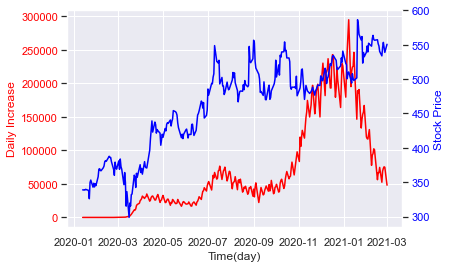

<Figure size 75x75 with 0 Axes>

In [34]:
nflx_edit = nflx_close.reset_index()
nflx_edit.date = pd.to_datetime(nflx_edit.date)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')
ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(nflx_edit.date, nflx_edit.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

### Delta Air Lines, Inc Daily Close

<AxesSubplot:>

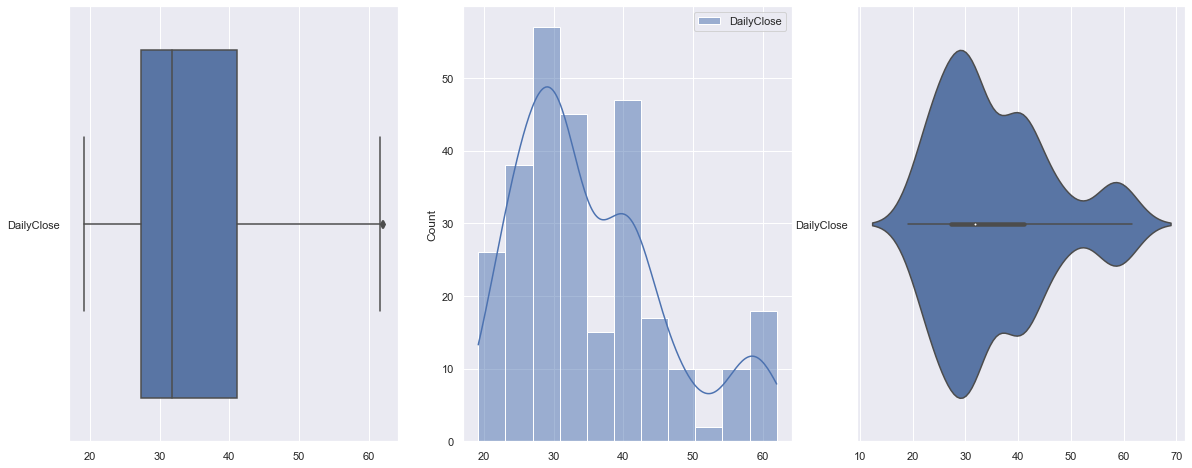

In [35]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = dal_close, orient = "h", ax = axes[0])
sb.histplot(data = dal_close, kde = True, ax = axes[1])
sb.violinplot(data = dal_close, orient = "h", ax = axes[2])

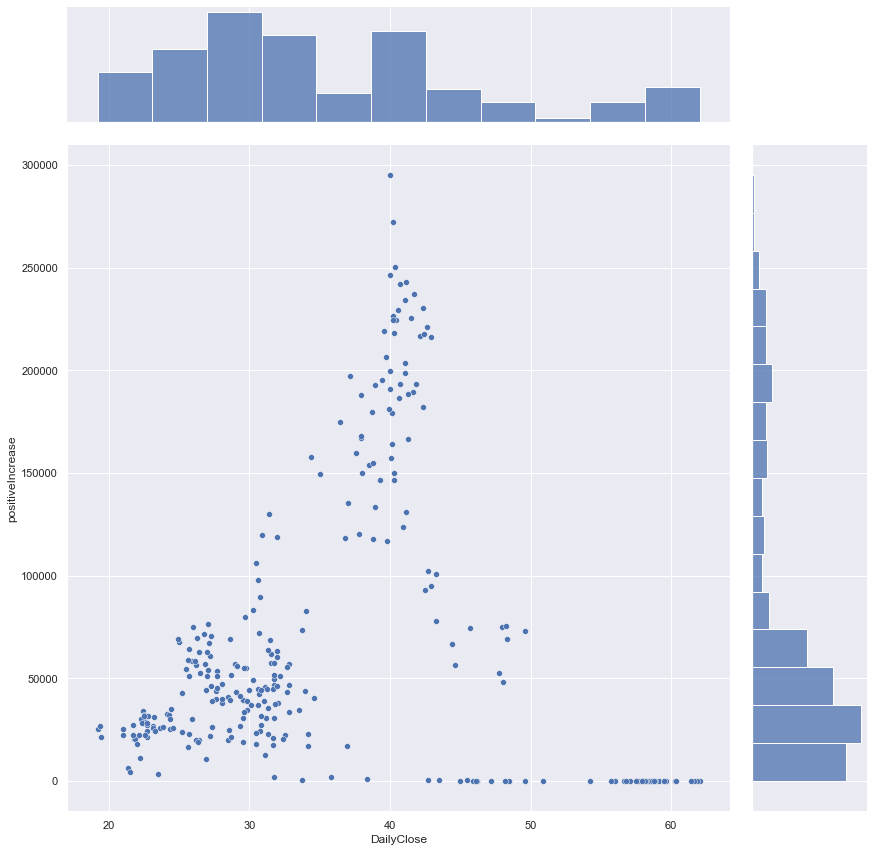

In [36]:
# Create a joint dataframe by concatenating the two variables
coviddal = pd.concat([covid_edit, dal_close], axis = 1).reindex(covid_edit.index)

sb.jointplot(data = coviddal, x = "DailyClose", y = "positiveIncrease", height = 12)
# coviddal

<AxesSubplot:>

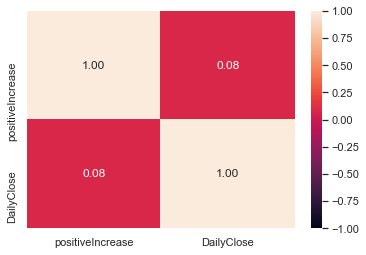

In [37]:
sb.heatmap(coviddal.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

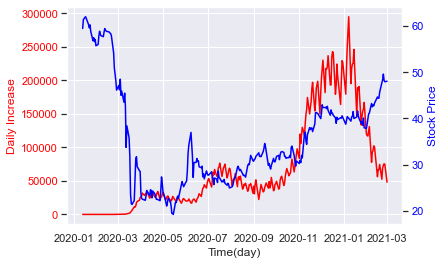

<Figure size 75x75 with 0 Axes>

In [38]:
dal_edit = dal_close.reset_index()
dal_edit.date = pd.to_datetime(dal_edit.date)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')
ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(dal_edit.date, dal_edit.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

### Dell Technologies Inc Daily Close

<AxesSubplot:>

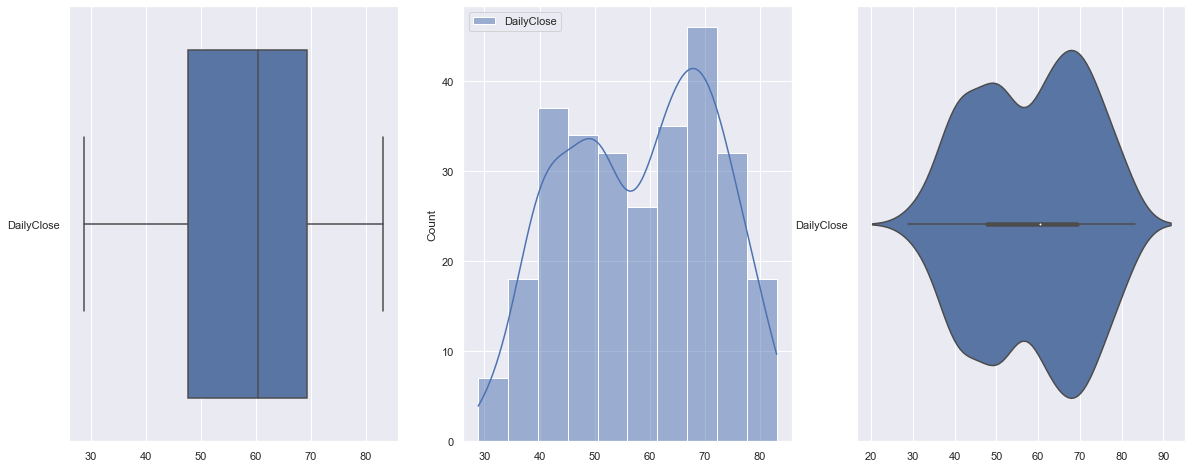

In [39]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = dell_close, orient = "h", ax = axes[0])
sb.histplot(data = dell_close, kde= True, ax = axes[1])
sb.violinplot(data = dell_close, orient = "h", ax = axes[2])

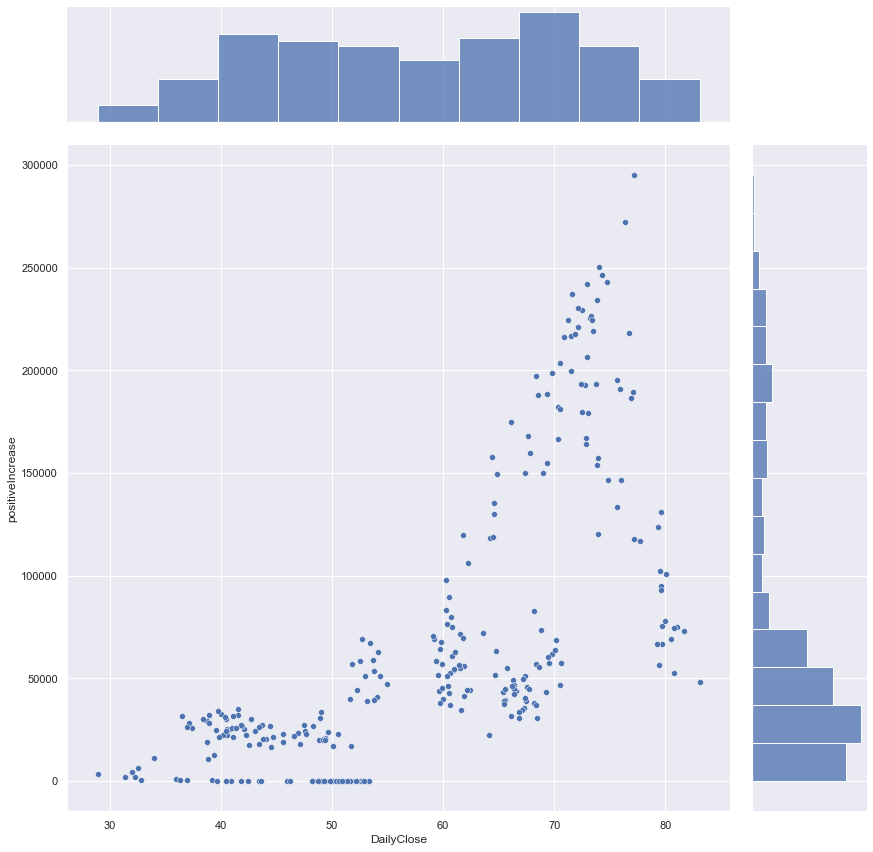

In [40]:
# Create a joint dataframe by concatenating the two variables
coviddell = pd.concat([covid_edit, dell_close], axis = 1).reindex(covid_edit.index)
sb.jointplot(data = coviddell, x = "DailyClose", y = "positiveIncrease", height = 12)

# coviddell

<AxesSubplot:>

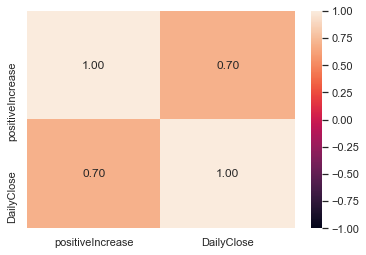

In [41]:
sb.heatmap(coviddell.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

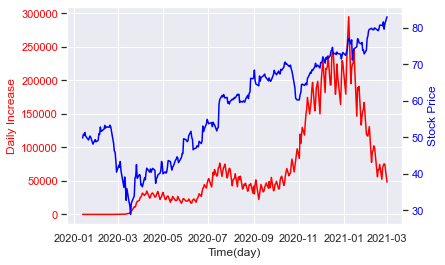

<Figure size 75x75 with 0 Axes>

In [42]:
dell_edit = dell_close.reset_index()
dell_edit.date = pd.to_datetime(dell_edit.date)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(dell_edit.date, dell_edit.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

### BP Daily Close

<AxesSubplot:>

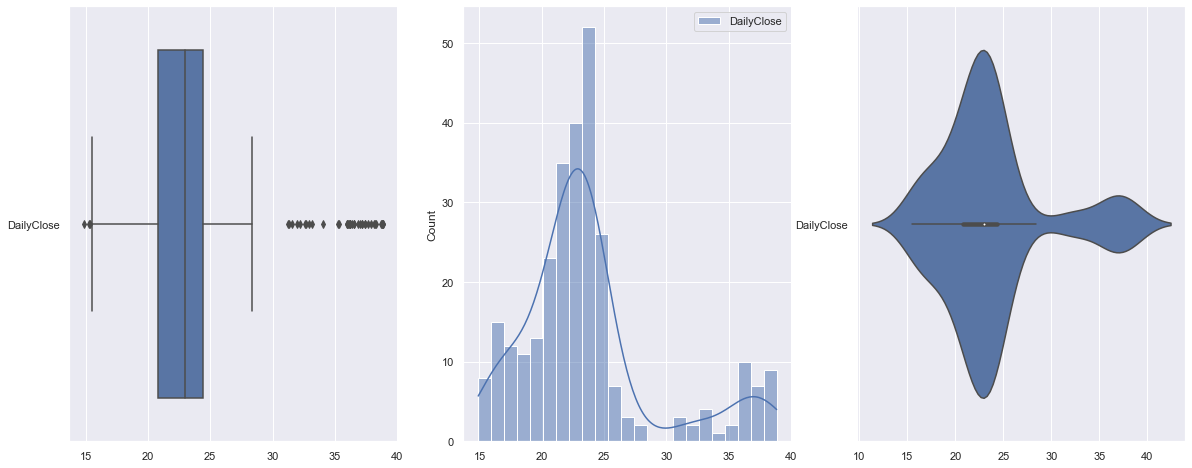

In [43]:
f, axes = plt.subplots(1, 3, figsize=(20, 8))

sb.boxplot(data = bp_close, orient = "h", ax = axes[0])
sb.histplot(data = bp_close, kde = True, ax = axes[1])
sb.violinplot(data = bp_close, orient = "h", ax = axes[2])

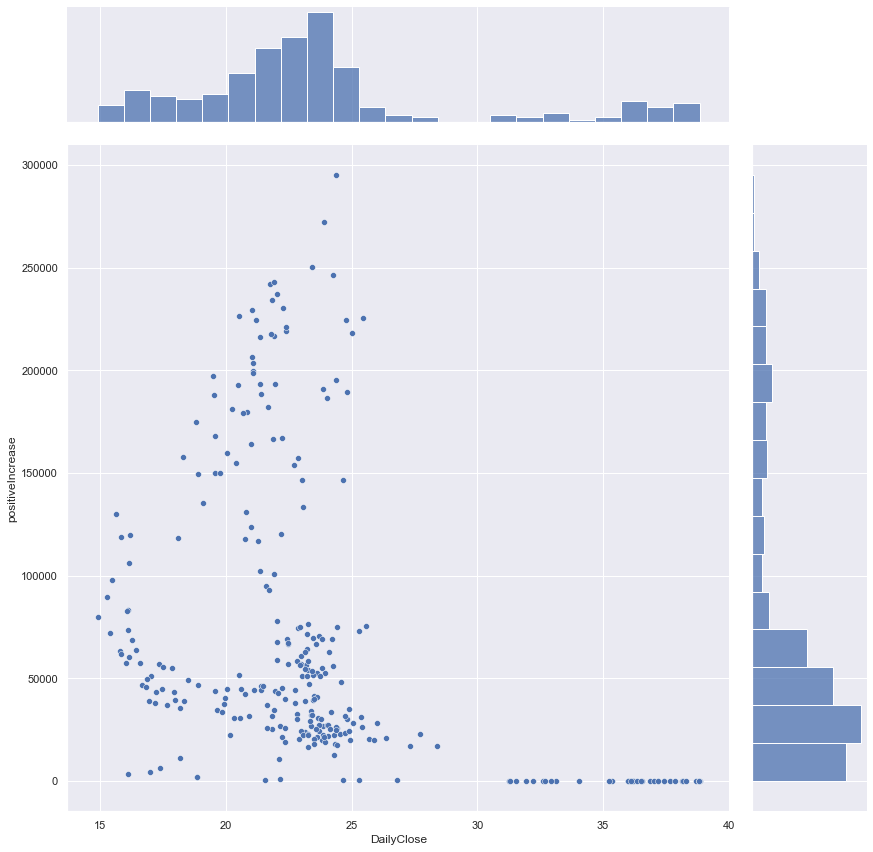

In [44]:
# Create a joint dataframe by concatenating the two variables
covidbp = pd.concat([covid_edit, bp_close], axis = 1).reindex(covid_edit.index)
sb.jointplot(data = covidbp, x = "DailyClose", y = "positiveIncrease", height = 12)

# covidbp

<AxesSubplot:>

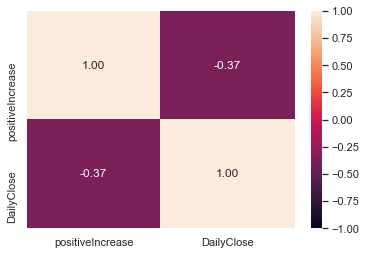

In [45]:
sb.heatmap(covidbp.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

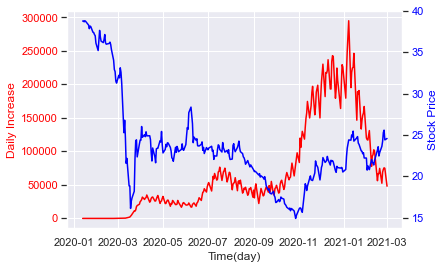

<Figure size 75x75 with 0 Axes>

In [46]:
bp_edit = bp_close.reset_index()
bp_edit.date = pd.to_datetime(bp_edit.date)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Time(day)")
ax1.set_ylabel("Daily Increase", color = 'red')
ax1.plot(covid_edit.index, covid_edit.positiveIncrease, color='red')
ax1.tick_params(axis='y', labelcolor = 'red')

ax2 = ax1.twinx()
ax2.set_ylabel("Stock Price", color = 'blue')
ax2.plot(bp_edit.date, bp_edit.DailyClose, color='blue')
ax2.tick_params(axis='y', labelcolor = 'blue')
plt.grid(False)
plt.figure(figsize=(0.5,0.5), dpi=150)
plt.show()

---
## Machine Learning

In [47]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Moderna Machine Learning

Intercept of Regression 	: b =  [46.48047258]
Coefficients of Regression 	: a =  [[0.00042507]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.34555380756241916
Mean Squared Error (MSE) 	: 104.10803496771487

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.13315003267121306
Mean Squared Error (MSE) 	: 1414.4662778842428



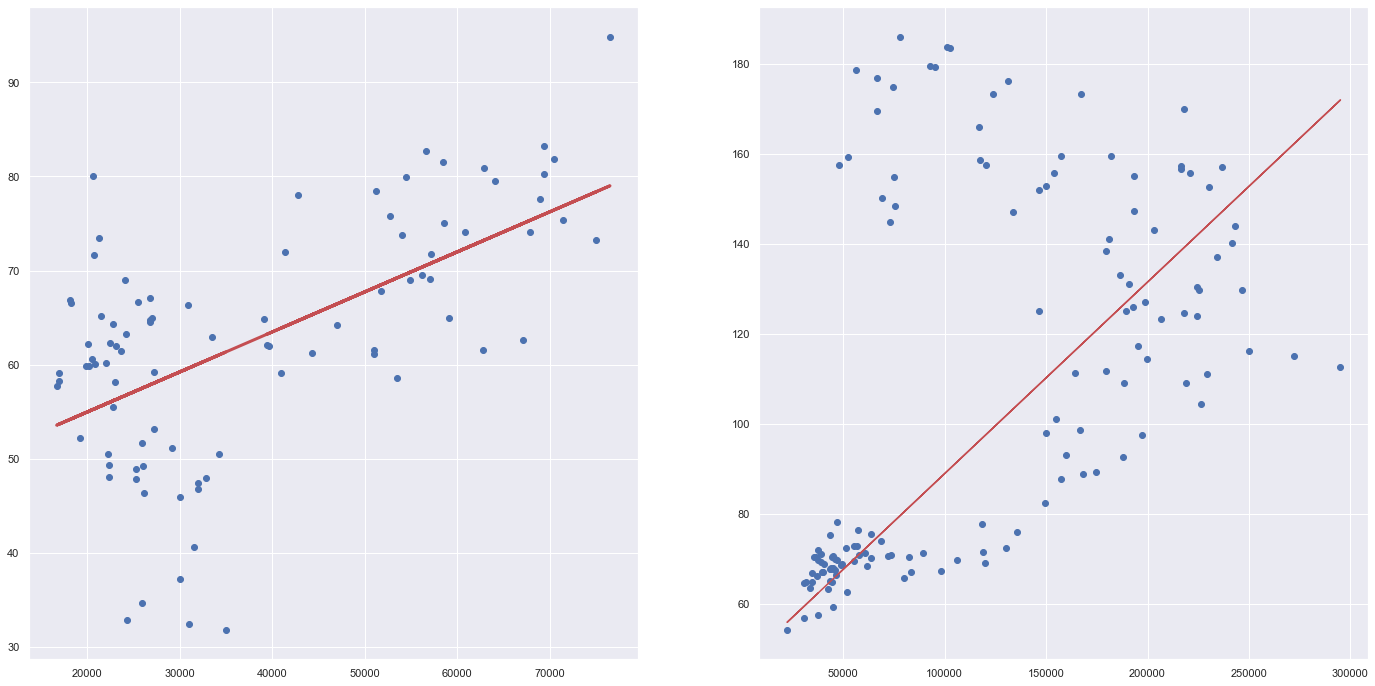

In [48]:
# Split the Dataset into Train and Test
X_train = covid_edit.iloc[135:225,:]
X_test = covid_edit.iloc[:135,:]
y_train = mrna_close.iloc[135:225,:]
y_test = mrna_close.iloc[:135,:]


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, y_train_pred, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

### Moderna Time Shifted Machine Learning

Intercept of Regression 	: b =  [63.69187174]
Coefficients of Regression 	: a =  [[8.75898309e-05]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.037481620035688334
Mean Squared Error (MSE) 	: 59.9385918240115

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -1.1545206907555001
Mean Squared Error (MSE) 	: 2993.473855358065



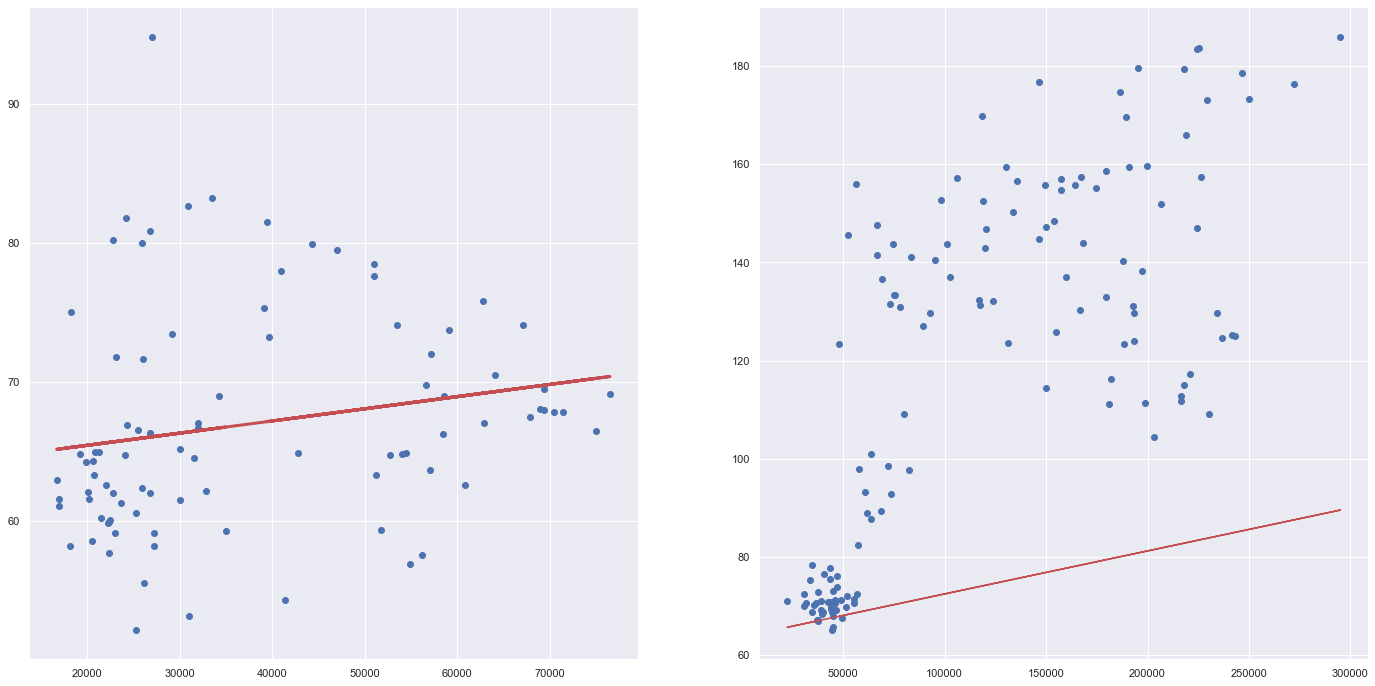

In [57]:
## Split the Dataset into Train and Test
X_train = covid_edit.iloc[135:225,:]
X_test = covid_edit.iloc[:135,:]
y_train = mrna_close2.iloc[135:225,:]
y_test = mrna_close2.iloc[:135,:]


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, y_train_pred, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

### Johnson & Johnson Machine Learning

Intercept of Regression 	: b =  [146.97191175]
Coefficients of Regression 	: a =  [[-7.14388229e-06]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0011828135975081588
Mean Squared Error (MSE) 	: 13.11133036271678

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.6834357462760561
Mean Squared Error (MSE) 	: 99.5907063111278



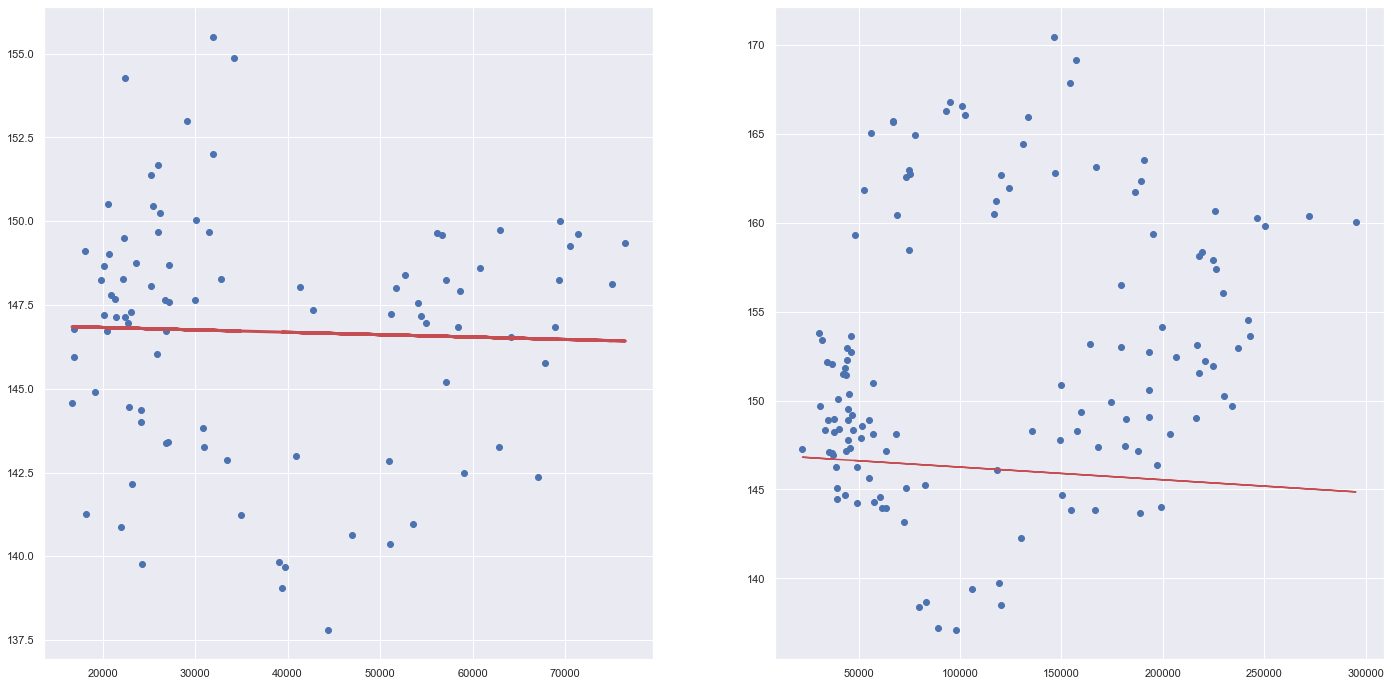

In [50]:
# Split the Dataset into Train and Test
y_train = jnj_close.iloc[135:225,:]
y_test = jnj_close.iloc[:135,:]
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

### Netflix Inc Machine Learning

Intercept of Regression 	: b =  [388.97852685]
Coefficients of Regression 	: a =  [[0.00171279]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6612514339536246
Mean Squared Error (MSE) 	: 457.22024685264415

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -27.693066993200244
Mean Squared Error (MSE) 	: 21709.39799290112



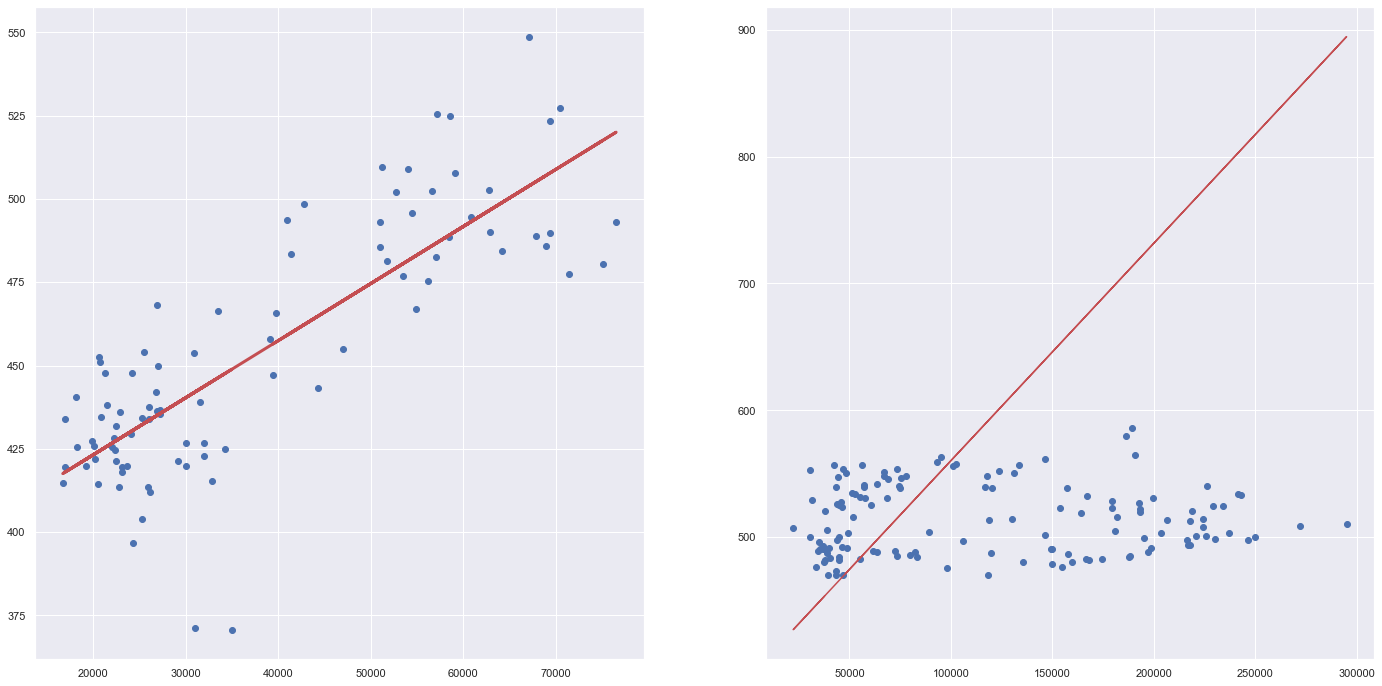

In [51]:
# Split the Dataset into Train and Test
y_train = nflx_close.iloc[135:225,:]
y_test = nflx_close.iloc[:135,:]

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, y_train_pred, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

### Delta Air Lines, Inc Machine Learning

Intercept of Regression 	: b =  [25.23638557]
Coefficients of Regression 	: a =  [[2.35342508e-05]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.014913422544037602
Mean Squared Error (MSE) 	: 11.13028577457708

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -2.257417552556559
Mean Squared Error (MSE) 	: 97.41719636283588



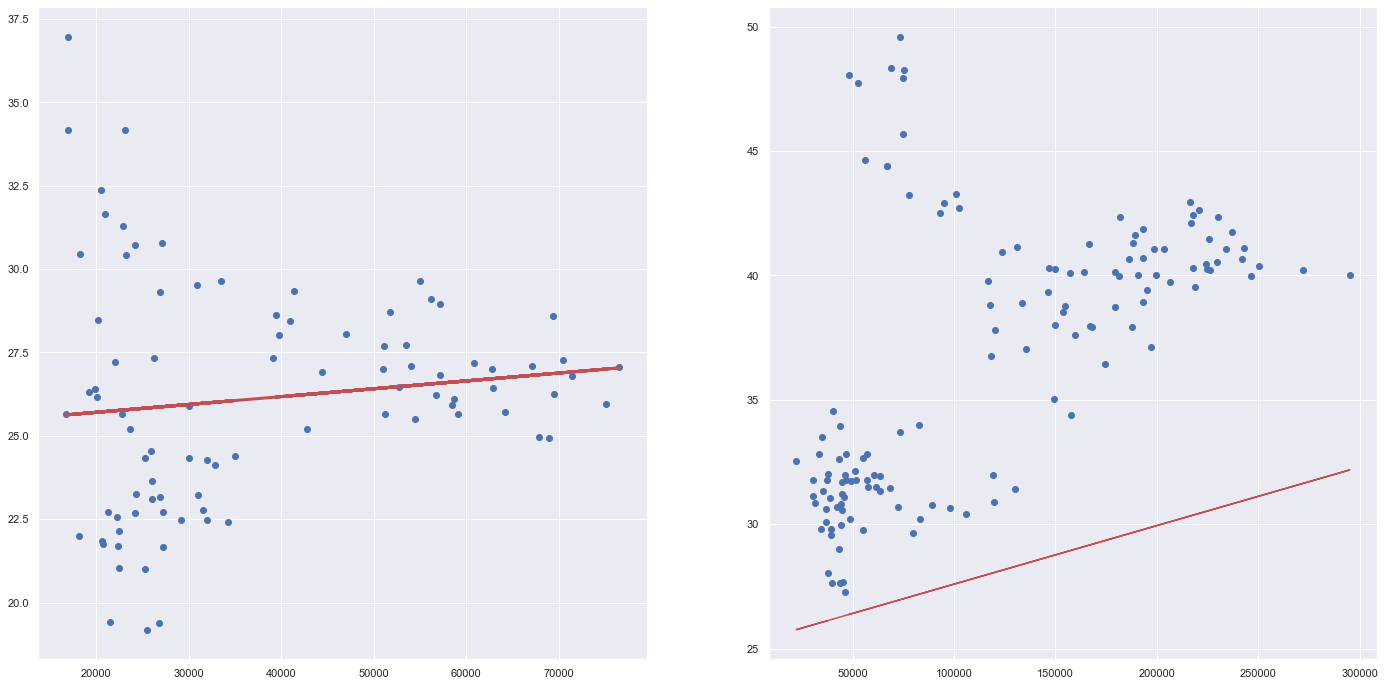

In [52]:
# Split the Dataset into Train and Test
y_train = dal_close.iloc[135:225,:]
y_test = dal_close.iloc[:135,:]

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

### Dell Techonologies Inc Machine Learning

Intercept of Regression 	: b =  [36.63126101]
Coefficients of Regression 	: a =  [[0.000344]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6230225634701634
Mean Squared Error (MSE) 	: 21.7840993184671

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -16.752964475522155
Mean Squared Error (MSE) 	: 590.8233305009651



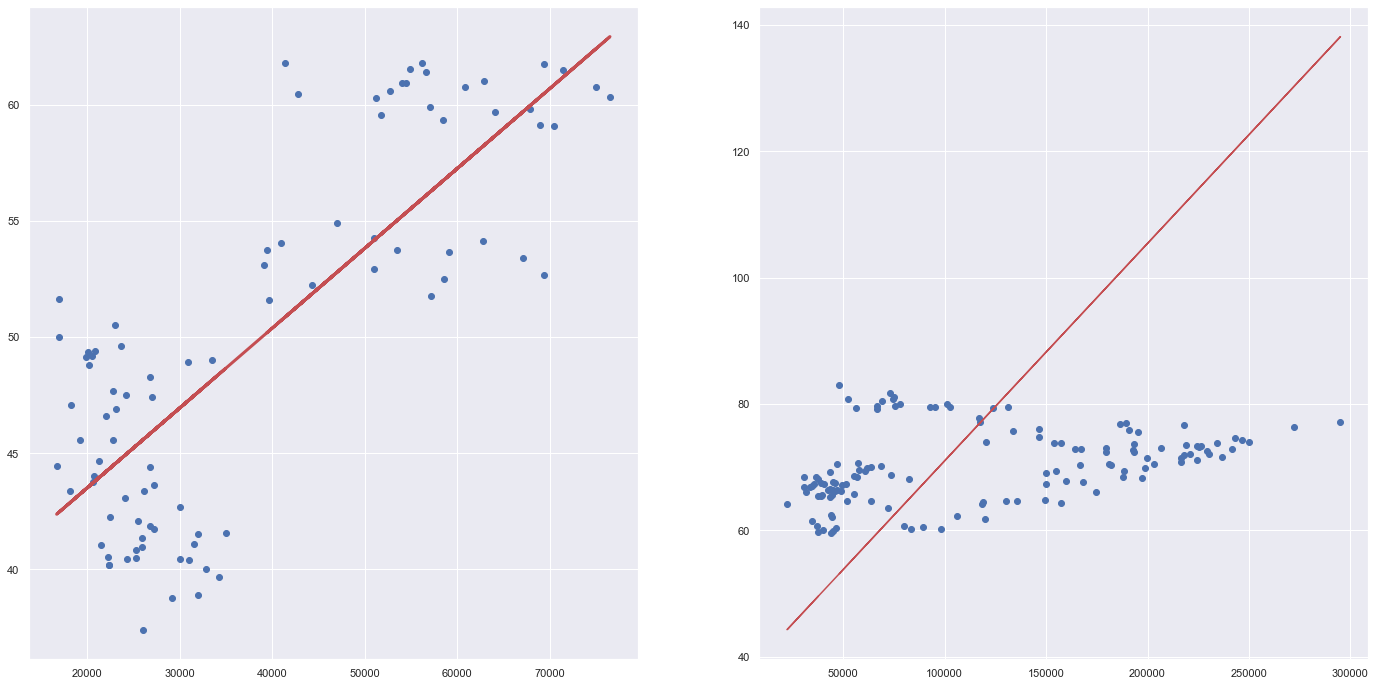

In [53]:
# Split the Dataset into Train and Test
y_train = dell_close.iloc[135:225,:]
y_test = dell_close.iloc[:135,:]

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

### BP Machine Learning

Intercept of Regression 	: b =  [24.60524995]
Coefficients of Regression 	: a =  [[-2.50563922e-05]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1387109595207322
Mean Squared Error (MSE) 	: 1.185997305510726

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -1.2336352388123144
Mean Squared Error (MSE) 	: 16.180733177694435



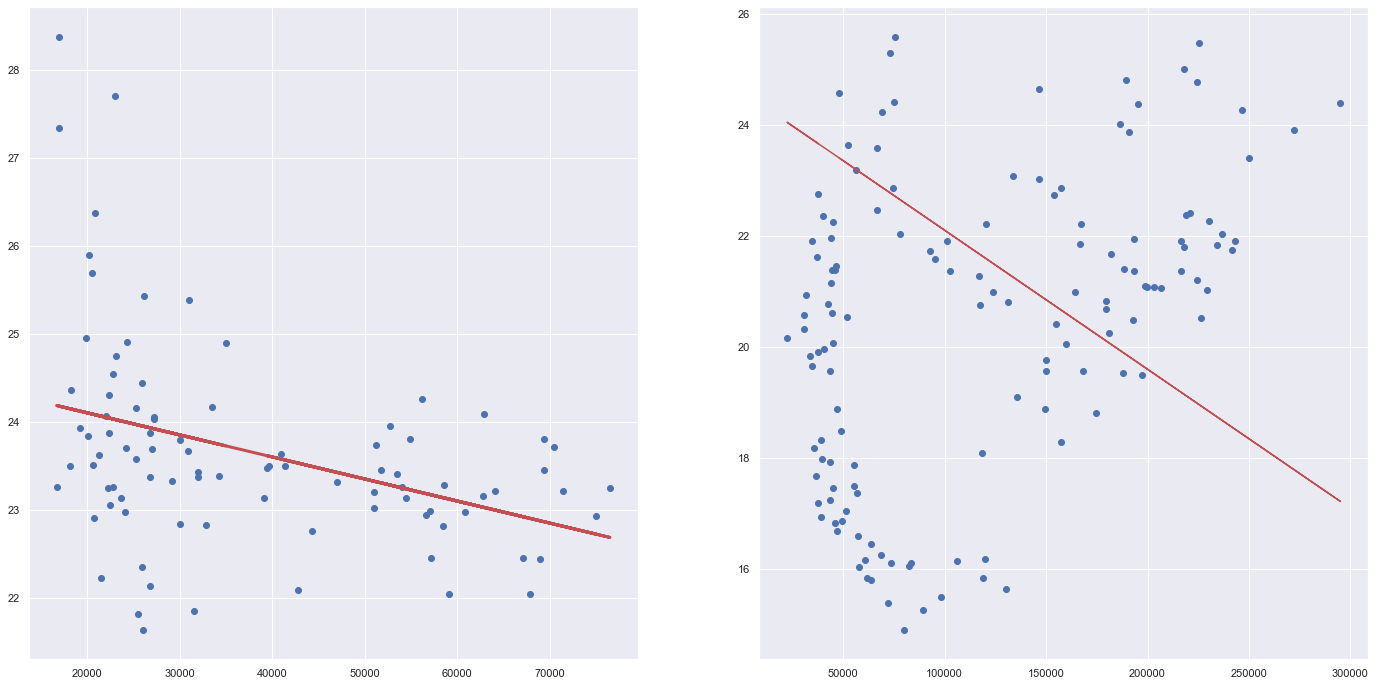

In [54]:
# Split the Dataset into Train and Test
y_train = bp_close.iloc[135:225,:]
y_test = bp_close.iloc[:135,:]

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
axes[0].scatter(X_train, y_train)
axes[0].plot(regline_x, regline_y, 'r-', linewidth = 3)

axes[1].scatter(X_test, y_test)
axes[1].plot(X_test, y_test_pred, 'r-')

plt.show()

## Learning Points

- An API allows the user to collect real time data that is updated regularly, depending on the data provider
- How to use API key to retrieve real time data
- How using pd.to_datetime().date() allows appropriate date format to be used
- Understanding the data that we are extracting from eg. Stock Market closes on weekends and holidays, thus we need to remove corresponding data for proper alignment
- Plotting of 2 time series data with different units on the same graph



